In [53]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time
import os
import pytesseract
import uuid
from googlesearch import search

In [61]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload = True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Emiel/.cache\torch\hub\master.zip
YOLOv5  2022-5-20 Python-3.9.12 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [266]:
def get_pics(nr, label):
    
    labels = [label]
    IMAGES_PATH = 'D:/PycharmProjects/YOLO/datasets/book_data/images'
    number_imgs = nr
    cap = cv2.VideoCapture(0)
    # Loop through labels
    for label in labels:
        print('Collecting images for {}'.format(label))

        # Loop through image range
        for img_num in range(number_imgs):
            print('Collecting images for {}, image number {}'.format(label, img_num))
            time.sleep(2)

            # Webcam feed
            ret, frame = cap.read()

            # Naming out image path
            imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

            # Writes out image to file 
            cv2.imwrite(imgname, frame)

            # Render to the screen
            
            cv2.imshow('Image Collection', frame)

            # 2 second delay between captures
            time.sleep(4)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2


In [86]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/best/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Emiel/.cache\torch\hub\master.zip
YOLOv5  2022-5-20 Python-3.9.12 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [55]:
cover = "D:/PycharmProjects/YOLO/datasets/book_data/images/valid/book_cover.ca847f63-d6f0-11ec-95b1-d85ed3a4c84e.jpg"
cover2 = "D:/PycharmProjects/YOLO/datasets/book_data/images/train/book_cover.27660022-d6d0-11ec-bbaa-d85ed3a4c84e.jpg"
spine = "D:/PycharmProjects/YOLO/datasets/book_data/images/jail/book_spine.1e5936c6-d703-11ec-bd6f-d85ed3a4c84e.jpg"
cover3 = "D:/PycharmProjects/YOLO/datasets/book_data/images/valid/book_cover.6e8d7905-d6f0-11ec-b1ac-d85ed3a4c84e.jpg"
cover4 = "D:/PycharmProjects/YOLO/datasets/book_data/images/train/book_cover.8d2e6dbc-d6ca-11ec-a976-d85ed3a4c84e.jpg"
cover5 = "D:/PycharmProjects/YOLO/datasets/book_data/images/train/book_cover.ef74a417-d70f-11ec-8198-d85ed3a4c84e.jpg"

#book_cover.ef74a417-d70f-11ec-8198-d85ed3a4c84e
back = "D:/PycharmProjects/YOLO/datasets/book_data/images/train/book_back.0cd89dc1-d6cc-11ec-b61c-d85ed3a4c84e.jpg"
folio1 = 'https://www.foliosociety.com/media/wysiwyg/22CRM4_hero_mob_3.jpg'
folio2 = 'https://pbs.twimg.com/media/EHjuyOLWwAIIXQz.jpg'
folio3 = 'https://www.hcbooksonline.com/wp-content/uploads/2022/03/29470.jpg'
folio4 = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiWRQfrt1cyYvyxy1FMBwxRAeNzcOk_s2YGg&usqp=CAU'
folio5 = 'https://www.foliosociety.com/media/catalog/product/cache/e83418f5c8bd42164da44fd6dd7abeb5/t/t/ttm.png'
folio6 = 'https://geekireland.com/wp-content/uploads/2017/10/Folio-Society-Christmas-Collection.jpg'
folio7 = 'https://cdn.shopify.com/s/files/1/0997/3962/products/NovelTea-Tins-6tin-Collection-Anise-Pekoe-Puer-Matcha-Lemon-Earl-Grey.jpg?v=1543953793'

In [56]:
results = model(cover5)

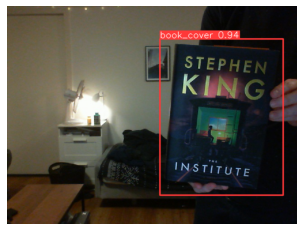

In [57]:
%matplotlib inline
plt.axis('off')
plt.imshow(np.squeeze(results.render()[0]))
plt.show()

In [58]:
results = model(cover2)

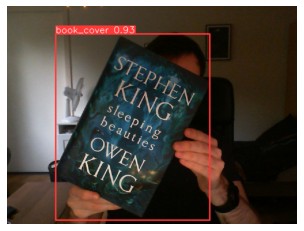

In [59]:
%matplotlib inline
plt.axis('off')
plt.imshow(np.squeeze(results.render()[0]))
plt.show()

In [60]:
create_frequency_dict = lambda words: {i:words.count(i) for i in set(words)}

In [422]:
def detect_book(verbose = True, find_title = False, confidence_req = 0.6):
    cap = cv2.VideoCapture(0)
    
    return_title_after_x = 5
    words = []
    frame_counter = 1
    word_recog_counter = 1
    not_new_frame_counter = 0
    new_frame_counter = 0
    while cap.isOpened():
        frame_counter+= 1
        
        ret, frame = cap.read()

        results = model(frame)
        info = return_info_dict(results)
        if len(info) > 0 and info[0]['name'] != 'book_back':
            cur_word_recog_counter = word_recog_counter
            if len(info) > 0 and info[0]['confidence'] > confidence_req:
                new_frame_counter += 1
                not_new_frame_counter = 0
                if new_frame_counter >= 12:
                    crop_image(info,results)      
                    words += get_words_from_img('cropped_image.png')
                    word_recog_counter += 1
            else:

                new_frame_counter = 0

                not_new_frame_counter += 1



            freq_dict = create_frequency_dict(words)
            freq_dict_sorted = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse = True)}
            words_str =' '.join(list(freq_dict_sorted.keys())[:5])


            if verbose and len(words) > 0:
                print('> ' + words_str)

            if word_recog_counter % (return_title_after_x +1) == 0 and cur_word_recog_counter != word_recog_counter:
                print(find_book_title(words_str))
                words = []
                frame_counter = 1
                word_recog_counter = 1

                if verbose:
                    print(freq_dict)

                time.sleep(0.5)
        
            
        else:
            
            new_frame_counter = 0
            not_new_frame_counter += 1
        
        if not_new_frame_counter >= 5:
            words = []
            frame_counter = 1
            word_recog_counter = 1
            now_new_frame_counter = 0 
            
        cv2.imwrite('live_image.png',np.squeeze(model(frame).render()))
    
            
        cv2.imshow('YOLO', np.squeeze(results.render()))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    %matplotlib inline
    img = cv2.imread('word_crop.png')
    plt.axis('off')
    plt.title(words_str)
    plt.imshow(img)
    
    cap.release()
    cv2.destroyAllWindows()

In [364]:
return_info_dict = lambda results: results.pandas().xyxy[0].to_dict(orient="records")

In [365]:
def crop_image(info, results):
    i = 0
    xmin,ymin,xmax,ymax = info[i]['xmin'], info[i]['ymin'], info[i]['xmax'], info[i]['ymax']
    y,h,x,w = int(min(ymin,ymax)), int(abs(ymin-ymax)), int(min(xmin,xmax)), int(abs(xmin-xmax))
    
    img = np.squeeze(results.render())
    
    crop_img = img.copy()[int(ymin):int(ymax), int(xmin):int(xmax)]
    cv2.imwrite('cropped_image.png',crop_img)
    
    

In [366]:
def get_words_from_img(img_path):
    pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"
    config = ('-l eng --oem 1 --psm 6')

    img = cv2.imread(img_path)
    #img = cv2.resize(img, None, fx = 2, fy = 2)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #adaptive_threshold = cv2.adaptiveThreshold(gray,300,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,41,15)
    
    #img = process_image_for_ocr(img_path)
    words = pytesseract.image_to_string(gray, config = config).replace('\n', ' ').lower()
    words = words.split(" ")
    cv2.imwrite('word_crop.png', gray)

    
    words = [x for x in words if x.isalpha() and len(x) > 1]
    return words
  

In [367]:
def find_book_title(q):
    
    q += ' goodreads book show'
    result = list(search(q, tld="co.in", num=1, stop=1, pause=0))
    if len(result) > 0:
        if result[0] == 'https://www.goodreads.com/':
            return None
        else:
            return result[0]
        
    return None

In [368]:
model.conf = 0.7

> dust steven dreams of erikson
> erikson dust steven aa is
> erikson steven dust aa is
> erikson steven dust aa is
> erikson steven dust bax aa
https://www.goodreads.com/book/show/4703427-dust-of-dreams
{'dust': 2, 'bax': 1, 'steven': 4, 'aa': 1, 'is': 1, 'dreams': 1, 'od': 1, 'of': 1, 'erikson': 5, 'be': 1, 'yet': 1, 'bn': 1}
> gavriel
> gavriel poti ae
> gavriel poti ae seas
> gavriel poti ae seas
> gavriel seas es is poti
https://www.goodreads.com/en/book/show/58863528
{'seas': 1, 'es': 1, 'is': 1, 'poti': 1, 'gavriel': 5, 'ae': 1}
> gur ets meee wea ee
> ven dust digans of erikson
> dust of erikson ven steven
> of erikson dust steven ven
> of erikson dust steven ven
> of erikson dust steven ven
https://www.goodreads.com/book/show/4703427-dust-of-dreams
{'ven': 1, 'dust': 3, 'steven': 3, 'wie': 1, 'is': 1, 'wean': 1, 'kson': 1, 'digans': 1, 'eri': 1, 'of': 5, 'ee': 1, 'erikson': 4, 'ae': 1, 'ni': 1, 'digams': 1}


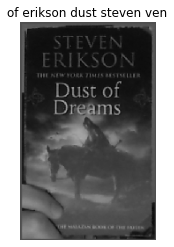

In [423]:
detect_book(verbose = True, find_title = True)